In [64]:
from radiomorpho import *
import skimage.feature # local binary patterns and other possibly useful stuff
import skimage.transform
import warnings; warnings.simplefilter('ignore')
from sklearn import decomposition

from skimage.transform import rotate, rescale
from skimage.io import imread
from matplotlib.patches import Ellipse

dirs = ('101first_fit', '101nvss_fit')
files, images = readImagesFromDirs(dirs)

error reading image 101first_fit/J0331-2849_z1.0890p_1.09Mpc.fi.fit or 101nvss_fit/J0331-2849_z1.0890p_1.09Mpc.nv.fit


# Analisis de formas

Uno de los problemas principales en el campo de analisis de formas es encontrar una forma adecuada de compararlas entre si. Una de las propiedades principales de las formas es su invarianza a rotación y translación.

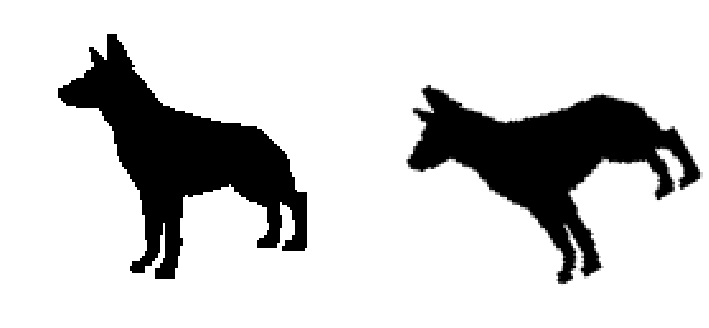

In [18]:
dogo = imread("kimia/dog1.png")
f, ax = plt.subplots(1, 2, figsize=(12,15))
ax[0].imshow(dogo, cmap='gray')
ax[0].axis('off')
ax[1].imshow(rotate(dogo, 30, cval=1, mode='constant'), cmap='gray')
ax[1].axis('off')
plt.show()

Existen varias formas de abordar este problema, la primera y la más usada, es analisis de procrustes con proyecciones sobre el espacio tangencial a la forma promedio. Otra solución en la literatura consiste en extraer caracteristicas de la forma que sean invariante a rotación y translación. Entre estas se encuentran transformaciones de Fourier, medidas de distancia interna entre otras.

En el problema de caracterización de imágenes de radio galaxias surgen varios problemas al tratar de utilizar los métodos comúnmente usados en análisis de formas. 

Las imágenes presentan formas en escala de grises, si queremos utilizar los métodos para formas binarias tendríamos que seleccionar un umbral sobre el cual tomar la forma. Aun que este camino podría darnos algunos resultados útiles estaríamos desaprovechando la información que nos brindan las imágenes en escala de grises. Por otra parte también tendríamos otro problema, no todas las imágenes tendrán un contorno cerrado después de umbralizar.

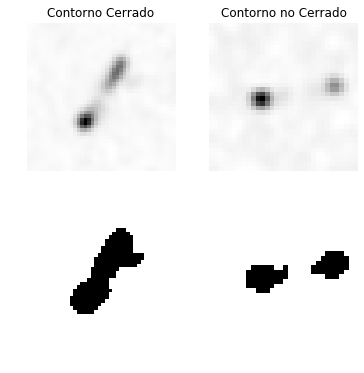

In [96]:
f, ax = plt.subplots(2, 2, figsize=(6,6))
ax[0][0].axis('off')
ax[0][1].axis('off')
ax[1][0].axis('off')
ax[1][1].axis('off')

ax[0][0].set_title('Contorno Cerrado')
ax[0][1].set_title('Contorno no Cerrado')

ax[0][0].imshow(1-images[1,1], cmap='gray')
ax[0][1].imshow(1-images[0,1], cmap='gray')

ax[1][0].imshow(images[1,1] < Kittler_flot(images[1,1]), cmap='gray')
ax[1][1].imshow(images[0,1] < Kittler_flot(images[0,1]), cmap='gray')
plt.show()

Esto es un problema ya que cada forma en verdad es la combinación de dos o más subformas que, dependiendo entre sus distancias, pueden parecer una forma completa al umbralizar.

Otro de los problemas es la cantidad de ruido que las imágenes tienen, afortunadamente este se puede remover casi completamente usando un umbralizado y la regla `x if x > umbral else 0`

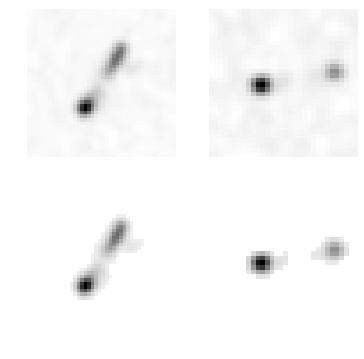

In [52]:
f, ax = plt.subplots(2, 2, figsize=(6,6))
ax[0][0].axis('off')
ax[0][1].axis('off')
ax[1][0].axis('off')
ax[1][1].axis('off')

ax[0][0].imshow(1-images[1,1], cmap='gray')
ax[0][1].imshow(1-images[0,1], cmap='gray')

ax[1][0].imshow(1-remove_data_bellow_threshold(images[1, 1]), cmap='gray')
ax[1][1].imshow(1-remove_data_bellow_threshold(images[0, 1]), cmap='gray')
plt.show()

El tercer problema con estas imágenes y quizá el más dificil de corregir, es que algunas radio galaxias están muy juntas (en la imágen) y componentes de una pueden llegar a confundirse con las de la otra.

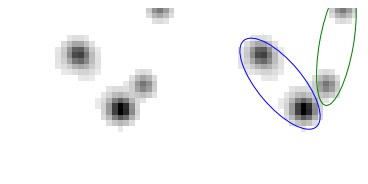

In [93]:
f, ax = plt.subplots(1, 2, figsize=(6,6))
img = 1 - remove_data_bellow_threshold(images[15, 1])
ax[0].axis('off')
ax[1].axis('off')

ax[0].imshow(img, cmap='gray')
ax[1].imshow(img, cmap='gray')
ax[1].add_artist(Ellipse((12, 13), 20, 8, angle=50, color='b', fill=False))
ax[1].add_artist(Ellipse((22, 6) , 6, 22, angle=10, color='g', fill=False))

plt.show()

Las manchas en el elipse azul pertenecen a una galaxia, mientras que las del elipse verde pretenecen a otra.